# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

Hint: Use `pd.read_csv()`


In [6]:
df=pd.read_csv('all_data.csv')
print(df.head())
print(len(df))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
96


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [4]:
print(df.groupby('Country').head(1))

                     Country  Year  Life expectancy at birth (years)  \
0                      Chile  2000                              77.3   
16                     China  2000                              71.7   
32                   Germany  2000                              78.0   
48                    Mexico  2000                              74.8   
64  United States of America  2000                              76.8   
80                  Zimbabwe  2000                              46.0   

             GDP  
0   7.786093e+10  
16  1.211350e+12  
32  1.949950e+12  
48  6.836480e+11  
64  1.030000e+13  
80  6.689958e+09  


What years are represented in the data?

In [8]:
print(df.groupby('Year').head(1))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [9]:
df.head(1)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10


What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

Hint: Use `.rename()`. [You can read the documentation here.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)). </font>

In [29]:
df=df.rename(columns={"Life expectancy at birth (years)": "LEABY"})

Run `df.head()` again to check your new column name worked.

In [19]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 
Remember to `plt.show()` your chart!

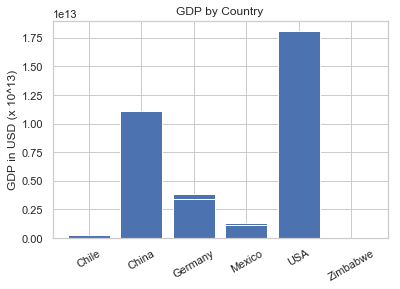

<Figure size 432x288 with 0 Axes>

In [163]:
ax = plt.subplot()
plt.bar(df['Country'], df['GDP'])
labels = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
ax.set_xticks(range(6))
ax.set_xticklabels(labels, rotation=30)
plt.title("GDP by Country")
plt.ylabel("GDP in USD (x 10^13)")
plt.show()
plt.savefig("GDP_Country_bar.png")

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

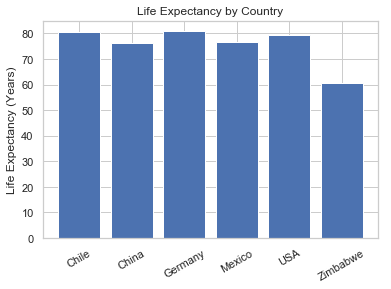

<Figure size 432x288 with 0 Axes>

In [164]:
ax = plt.subplot()
plt.bar(df['Country'], df['LEABY'])
labels = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
ax.set_xticks(range(6))
ax.set_xticklabels(labels, rotation=30)
plt.title("Life Expectancy by Country")
plt.ylabel("Life Expectancy (Years)")
plt.show()
plt.savefig("Life_Country_bar.png")

What do you notice about the two bar charts? Do they look similar?

In [ ]:
They don't look particularly similar at all. 

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
2. Be sure to show your plot

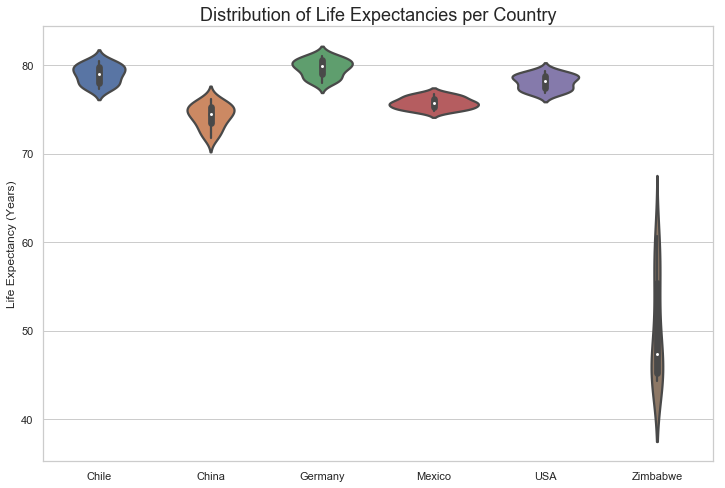

In [165]:
fig, ax = plt.subplots(figsize=(12, 8)) 
sns.set(style='whitegrid', context='talk')
sns.violinplot(data=df, x='Country', y='LEABY', palette='deep')
ax.set_ylabel("Life Expectancy (Years)")
labels = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
ax.set_xticks(range(6))
ax.set_xticklabels(labels)
ax.set_xlabel("")
plt.title("Distribution of Life Expectancies per Country")
plt.savefig("Life_Country_violin.png")

What do you notice about this distribution? Which country's life expactancy has changed the most?

In [ ]:
Clearly the country with the largest distribution is Zimbabwe. The other distribution that stands out is Mexico,
which is skewed to the right, suggesting that there are more people with a lower life expectancy than the mean. 

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks("rotation=90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


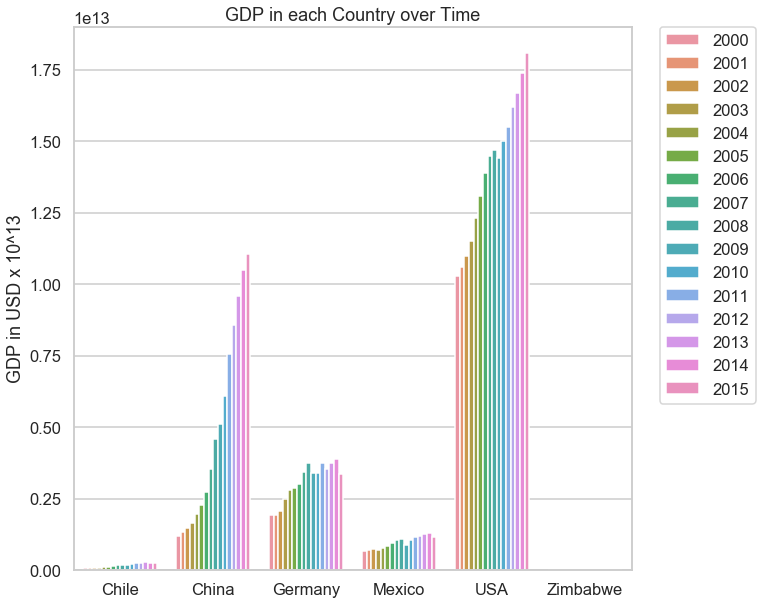

In [166]:
f, ax = plt.subplots(figsize=(10, 10)) 
sns.set(style='whitegrid', context='talk')
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)
ax.set_ylabel("GDP in USD x 10^13")
labels = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
ax.set_xticks(range(6))
ax.set_xticklabels(labels)
ax.set_xlabel("")
plt.title("GDP in each Country over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("GDP_Country_Year_bar.png")

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


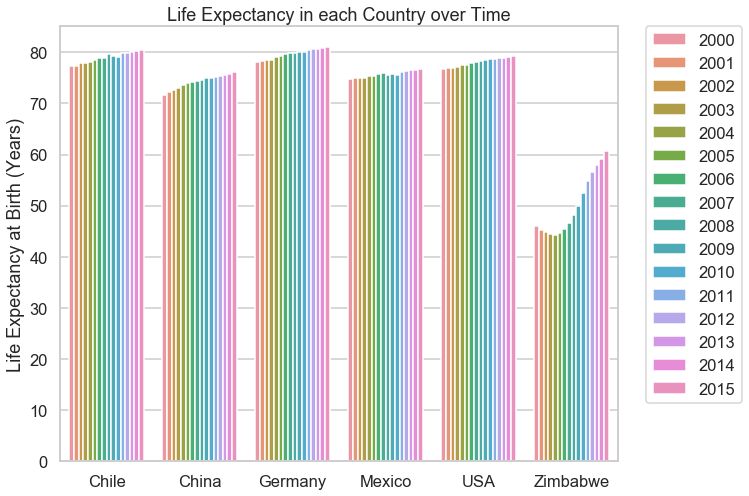

In [167]:
f, ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)
ax.set(ylabel="Life Expectancy at Birth (Years)")
labels = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
ax.set_xticks(range(6))
ax.set_xticklabels(labels)
ax.set_xlabel("")
plt.title("Life Expectancy in each Country over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("Life_Country_Year_bar.png")

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in GDP over time? 
- How do countries compare to one another?
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
- Can you think of any reasons that the data looks like this for particular countries?

In [29]:
Zimbabwe clearly changes the most for Life expectancy, and also has the lowest GDP,/
however, the highest life expectancies comes from Chile, which has the second lowest GDP. 
The biggest changes in GDP data occur between 2004 and 2008, whereas the biggest changes in the life expectancy appears 
to be following 2010.
The least change in GDP has been Zimbabwe followed by Chile.
The GDP is not a clear indicator of life expectancy. Generally, as the GDP of a country increases, 
the life expectancy increases, but not in all cases. 
Factors that likely also contribute to life expectancy need to include living conditions and political stability. Countries
like Chile have had stability, so while the GDP has steadily increased but remained low, the life expectancy has been among 
the highest. Zimbabwe has not had the same living conditions and access to modern medicine like the other countries. 
As the cost of production of these medicines and treatments have lowered and become more available from countries with the 
higher GPD, foreign aid can be a major contributing factor to the exponential increase in expectancy. The years around
2004 should be further investigated for political instability, wars, or disease outbreaks in Zimbabwe

SyntaxError: EOL while scanning string literal (<ipython-input-29-d421e3b65d51>, line 1)

Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


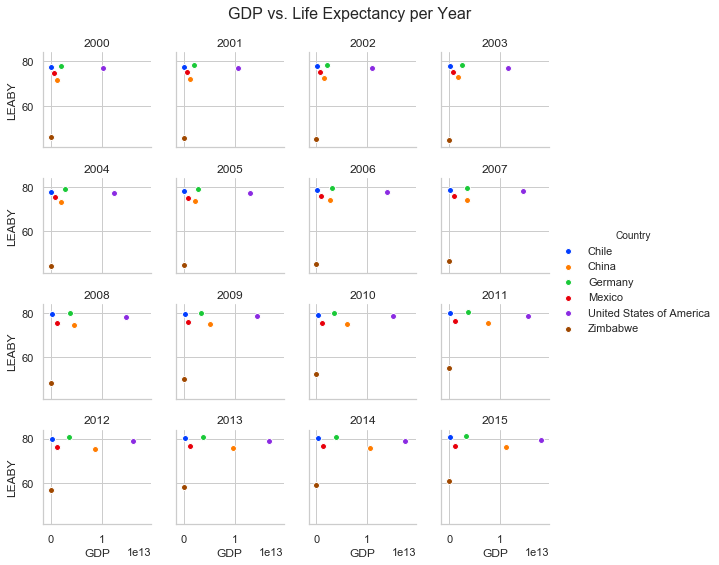

In [168]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter


# Uncomment the code below and fill in the blanks
sns.set(style='whitegrid', palette='bright')
g = sns.FacetGrid(df, col="Year", hue="Country", col_wrap=4, height=2)
g = (g.map(plt.scatter,"GDP", "LEABY", edgecolor="w").add_legend()).set_titles('{col_name}')
g.fig.suptitle('GDP vs. Life Expectancy per Year',fontsize=16)
g.fig.subplots_adjust(top=0.90)

plt.savefig("GDP_Life_Country_Year_facet.png")

+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

In [ ]:
China has the biggest increase in GDP over the years. 
Zimbabwe has the greatest increase in LEABY across the years
This is not surprising at all, though with the increase in GDP of China, we may have expected to see a greater increase
in the LEABY, but there is very little improvement, whereas Zimbabwe has virtually no change in GDP and has the 
greatest change in the LEABY
These are not particularly easy to read.

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



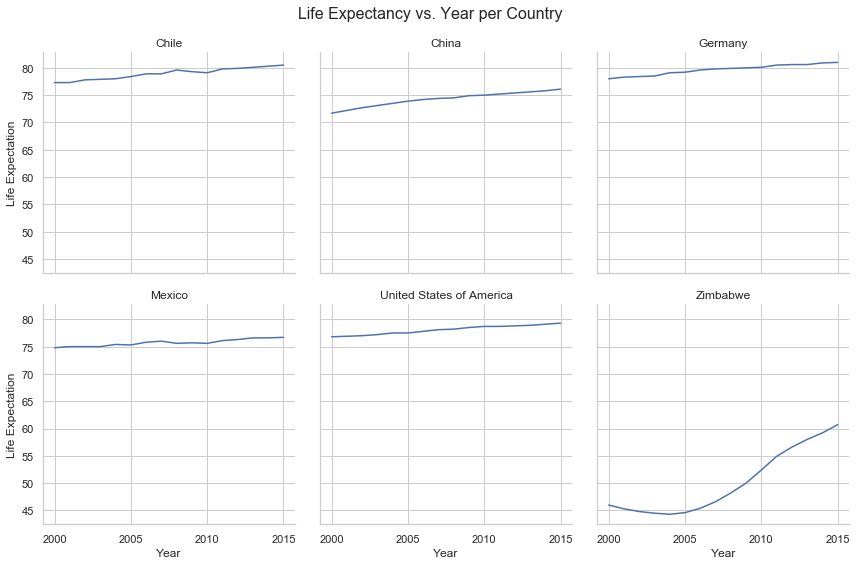

In [171]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"


# Uncomment the code below and fill in the blanks
sns.set(style='whitegrid')
g2 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4, palette='bright')
g2 = (g2.map(plt.plot, "Year", "LEABY").add_legend()).set_ylabels('Life Expectation').set_titles('{col_name}')
plt.locator_params(axis='x', nbins=4)
g2.fig.suptitle('Life Expectancy vs. Year per Country',fontsize=16)
g2.fig.subplots_adjust(top=0.90)

plt.savefig("Life_Country_Year_facet.png")

What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in life expectancy over time? 
- Can you think of any reasons that the data looks like this for particular countries?

 The lines for China and Zimbabwe change the most. 2004 to 2010 has the biggest change for Zimbabwe. The other countries are very similar. The least change over time is the US. The technological development of the US and Germany has been very high, but this doesn't account for the high LEABY in Chile. Access to clean water is likely the biggest contributing factor. 

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


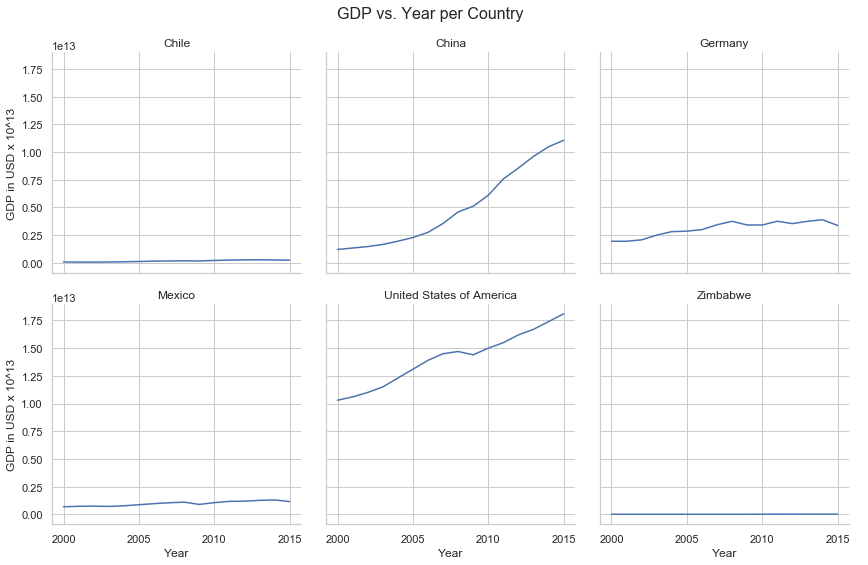

In [172]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "GDP").add_legend()).set_ylabels('GDP in USD x 10^13').set_titles('{col_name}')
plt.locator_params(axis='x', nbins=4)
g3.fig.suptitle('GDP vs. Year per Country',fontsize=16)
g3.fig.subplots_adjust(top=0.90)
plt.savefig("GDP_Country_Year_facet.png")

Which countries have the highest and lowest GDP?

In [ ]:
Highest is clearly US, and lowest is clearly Zimbabwe, but then followed by Chile

Which countries have the highest and lowest life expectancy?

In [ ]:
Highest expectancies are Chile, US, and Germany whereas thhe lowest is Zimbabwe 

## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?

By removing the data for Zimbabwe, the scale of the other countries is more clear to see the patterns in LEABY and GDP.
Even during the recession in the US from 2008-2011, the LEABY continued to increase. Chile's GDP has remained steady, though the LEABY of Chile has fluctuated a little each year. 
Looking at this data now, China has both the largest increase in both GDP and LEABY. Over those 15 years, China has refocused their economy on global exports and with their advancements in technology, they have seen a steady increase in LEABY. 

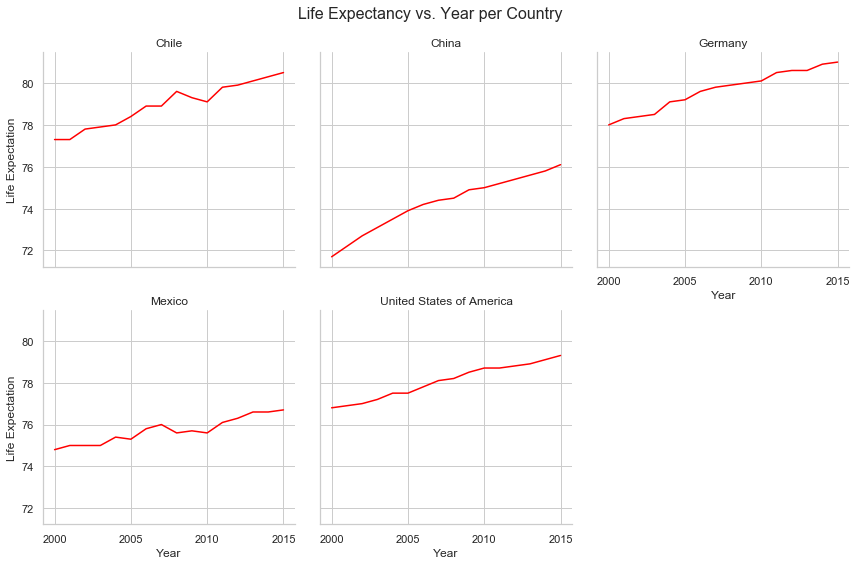

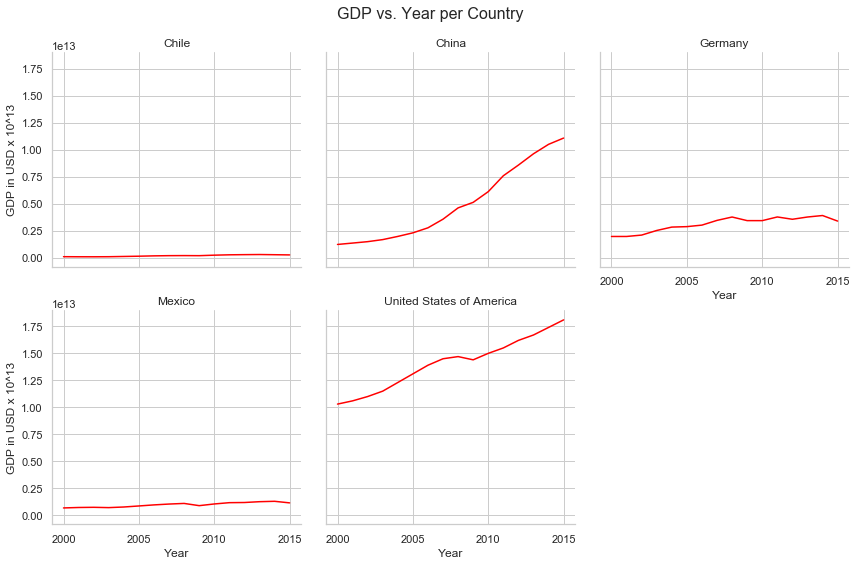

In [173]:
df2 = df[df.Country != "Zimbabwe"]
g4 = sns.FacetGrid(df2, col="Country", col_wrap=3, height=4)
g4 = (g4.map(plt.plot, "Year", "LEABY", color='red').add_legend()).set_ylabels('Life Expectation').set_titles('{col_name}')
plt.locator_params(axis='x', nbins=4)
g4.fig.suptitle('Life Expectancy vs. Year per Country',fontsize=16)
g4.fig.subplots_adjust(top=0.90)
plt.savefig("Life_Country_Year_noZ.png")

g5 = sns.FacetGrid(df2, col="Country", col_wrap=3, height=4)
g5 = (g5.map(plt.plot, "Year", "GDP", color='red').add_legend()).set_ylabels('GDP in USD x 10^13').set_titles('{col_name}')
plt.locator_params(axis='x', nbins=4)
g5.fig.suptitle('GDP vs. Year per Country',fontsize=16)
g5.fig.subplots_adjust(top=0.90)
plt.savefig("GDP_Country_Year_noZ.png")

## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data.
Include the following visuals in your blogpost:

1. The violin plot of the life expectancy distribution by country
2. The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
3. The facet grid of line graphs mapping GDP by country
4. The facet grid of line graphs mapping Life Expectancy by country


We encourage you to spend some time customizing the color and style of your plots! Remember to use `plt.savefig("filename.png")` to save your figures as a `.png` file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:
+ How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
+ What would have helped make the project data more reliable? What were the limitations of the dataset?
+ Which graphs better illustrate different relationships??

In [48]:
"Between 1999 and 2005 in Zimbabwe, there was significant political instability with a party trying to maintain power by seizing 
control of anything they deemed a criminal enterprise. This led to a massive depression, loss of jobs and income 
to over 700,000 people. It was estimated in 2004 alone that over 100,000 peopl died from starvation and malnutrition. 
Meanwhile, due to the scarcity of resources, the inflation in the country reached 100000%, the highest in the world by 2007.   
In 2005, a Senate system was added to the government. 
In 2008, $7.3 million was spent to fight AIDS, Malaria, and Tuberculosis - diseases that are not nearly as prevalent in any
of the other countries represented in these graphs. 

When the country is focused on preventing war and maintaining political stability, the spending on health of the citizens 
is not the top priority. Thus, even with a low GDP, countries such as Mexico and Chile have a high LEABY. The higher GDP
correlates with a smoother curve, thus less fluctuation in the LEABY.

Limitations of the dataset are that it only examines one parameter - GDP with Life Expectancy. Other important factors 
could include the population, births per year, deaths per year, ages at death. Are we seeing many childhood deaths? 

The facet line graphs showed the clearest individual picture, but the bar graphs actually showed the huge disparities
accross all of the data. 

SyntaxError: EOL while scanning string literal (<ipython-input-48-690fe987fc50>, line 1)